# Behavior of the urban traffic of the city of Sao Paulo in Brazil Data Set
O conjunto de dados foi criado com registros do comportamento do trânsito urbano da cidade de São Paulo no Brasil de 14 de dezembro de 2009 a 18 de dezembro de 2009 (de segunda a sexta-feira). Registrado das 7:00 às 20:00 a cada 30 minutos. O conjunto de dados Comportamento do trânsito urbano da cidade de São Paulo, Brasil, foi utilizado em pesquisas acadêmicas da Universidade Nove de Julho - Programa de Pós-Graduação em Informática e Gestão do Conhecimento.



Para mais informações: https://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil#

## Por que esse dataset?

É um dataset nacional, famoso ate, simples, facil de entender, é uma boa oportunidade para se trabalhar com series temporais,  e serve tanto panto para regressao quanto para classificaçao 

### Colaboradores


- 	LUAN VEIGA SAMPAIO FEO

- 	LUCAS HENRIK JESUS SILVA

- 	LUCAS ROTH DA SILVA

- 	MATHEUS DE VERAS LINO

- 	PABLO DANTAS EVANGELISTA DOS SANTOS

- 	THIAGO DO SANTOS RODACKI


### Leitura de dados com pandas

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set_palette('winter_r')

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('behavior_of_the_urban_traffic.csv', sep = ';', decimal = ',')
df.head()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


Os numeros correspondem ao numero de ocorrencias que um tipo de acidente especifico ocorreu em um determinado intervalo de tempo

In [3]:
# Vendo se há algum valor ausente no conjunto de dados
df.isnull().sum()

Hour (Coded)                             0
Immobilized bus                          0
Broken Truck                             0
Vehicle excess                           0
Accident victim                          0
Running over                             0
Fire vehicles                            0
Occurrence involving freight             0
Incident involving dangerous freight     0
Lack of electricity                      0
Fire                                     0
Point of flooding                        0
Manifestations                           0
Defect in the network of trolleybuses    0
Tree on the road                         0
Semaphore off                            0
Intermittent Semaphore                   0
Slowness in traffic (%)                  0
dtype: int64

In [4]:
# Vendo algumas estatisticas
df.describe()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
count,135.00000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,14.00000,0.340741,0.874074,0.029630,0.422222,0.118519,0.007407,0.007407,0.007407,0.118519,0.007407,0.118519,0.051852,0.229630,0.044444,0.125926,0.014815,10.051852
std,7.81789,0.659749,1.102437,0.170195,0.696116,0.346665,0.086066,0.086066,0.086066,0.504485,0.086066,0.712907,0.222554,0.818998,0.206848,0.464077,0.121261,4.363243
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000
25%,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.400000
50%,14.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
75%,21.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.850000
max,27.00000,4.000000,5.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,7.000000,1.000000,8.000000,1.000000,4.000000,1.000000,23.400000


### Manipulação e limpeza de dados com pandas

No Manual de Comunicação informa que 
 - A manhã, é das 6h às 12h (ou ao meio-dia).
 - A tarde, é das 12h às 18h.
 - A noite, e das 18h às 24h (ou meia-noite)
 
Fonte: https://www12.senado.leg.br/manualdecomunicacao/estilos/hora#:~:text=A%20madrugada%20vai%20da%20zero,(ou%20meia%2Dnoite).

In [5]:
# Como a hora está em numeros, vamos dividi-lo em periodos 
def HoraDoDia(num):
    if num < 11:        
        return 'Manha'
    elif num >= 11 and num == 22 :
        return 'Tarde'
    elif num > 22:
        return 'Noite'

In [6]:
# Criando as classes
df['HoraDoDia'] = df['Hour (Coded)'].map(HoraDoDia)
df['HoraDoDia'].tail()

130    Noite
131    Noite
132    Noite
133    Noite
134    Noite
Name: HoraDoDia, dtype: object

In [7]:
# Substituindo os numeros pela hora correspondente 

df.loc[df['Hour (Coded)'] == 1,'Hour (Coded)']='7:00'
df.loc[df['Hour (Coded)'] == 2,'Hour (Coded)']='7:30'
df.loc[df['Hour (Coded)'] == 3,'Hour (Coded)']='8:00'
df.loc[df['Hour (Coded)'] == 4,'Hour (Coded)']='8:30'
df.loc[df['Hour (Coded)'] == 5,'Hour (Coded)']='9:00'
df.loc[df['Hour (Coded)'] == 6,'Hour (Coded)']='9:30'
df.loc[df['Hour (Coded)'] == 7,'Hour (Coded)']='10:00'
df.loc[df['Hour (Coded)'] == 8,'Hour (Coded)']='10:30'
df.loc[df['Hour (Coded)'] == 9,'Hour (Coded)']='11:00'
df.loc[df['Hour (Coded)'] == 10,'Hour (Coded)']='11:30'
df.loc[df['Hour (Coded)'] == 11,'Hour (Coded)']='12:00'
df.loc[df['Hour (Coded)'] == 12,'Hour (Coded)']='12:30'
df.loc[df['Hour (Coded)'] == 13,'Hour (Coded)']='13:00'
df.loc[df['Hour (Coded)'] == 14,'Hour (Coded)']='13:30'
df.loc[df['Hour (Coded)'] == 15,'Hour (Coded)']='14:00'
df.loc[df['Hour (Coded)'] == 16,'Hour (Coded)']='14:30'
df.loc[df['Hour (Coded)'] == 17,'Hour (Coded)']='15:00'
df.loc[df['Hour (Coded)'] == 18,'Hour (Coded)']='15:30'
df.loc[df['Hour (Coded)'] == 19,'Hour (Coded)']='16:00'
df.loc[df['Hour (Coded)'] == 20,'Hour (Coded)']='16:30'
df.loc[df['Hour (Coded)'] == 21,'Hour (Coded)']='17:00'
df.loc[df['Hour (Coded)'] == 22,'Hour (Coded)']='17:30'
df.loc[df['Hour (Coded)'] == 23,'Hour (Coded)']='18:00'
df.loc[df['Hour (Coded)'] == 24,'Hour (Coded)']='18:30'
df.loc[df['Hour (Coded)'] == 25,'Hour (Coded)']='19:00'
df.loc[df['Hour (Coded)'] == 26,'Hour (Coded)']='19:30'
df.loc[df['Hour (Coded)'] == 27,'Hour (Coded)']='20:00'

In [8]:
# Observando os tipos de dados de cada coluna
df.dtypes

Hour (Coded)                              object
Immobilized bus                            int64
Broken Truck                               int64
Vehicle excess                             int64
Accident victim                            int64
Running over                               int64
Fire vehicles                              int64
Occurrence involving freight               int64
Incident involving dangerous freight       int64
Lack of electricity                        int64
Fire                                       int64
Point of flooding                          int64
Manifestations                             int64
Defect in the network of trolleybuses      int64
Tree on the road                           int64
Semaphore off                              int64
Intermittent Semaphore                     int64
Slowness in traffic (%)                  float64
HoraDoDia                                 object
dtype: object

In [9]:
# Criando uma função para criar a variavel classe que vai conter os labels das classes 

def Class(num):
    if num < 9:        
        return 'Baixo'
    elif num >= 9 and num < 18 :
        return 'Medio'
    elif num >= 18:
        return 'Alto'

In [10]:
# Criando as classes
df['Class'] = df['Slowness in traffic (%)'].map(Class)
df['Class'].tail()

130    Medio
131     Alto
132    Medio
133    Medio
134    Medio
Name: Class, dtype: object

### Descritivo e exploração de dados com pandas (groupbys)

In [11]:
group_per_class = list(df.groupby(df['Class'].head()))
group_per_class

[('Baixo',
    Hour (Coded)  Immobilized bus  Broken Truck  Vehicle excess  \
  0         7:00                0             0               0   
  1         7:30                0             0               0   
  2         8:00                0             0               0   
  
     Accident victim  Running over  Fire vehicles  Occurrence involving freight  \
  0                0             0              0                             0   
  1                0             0              0                             0   
  2                0             0              0                             0   
  
     Incident involving dangerous freight  Lack of electricity  Fire  \
  0                                     0                    0     0   
  1                                     0                    0     0   
  2                                     0                    0     0   
  
     Point of flooding  Manifestations  Defect in the network of trolleybuses  \
  0        

Nota-se que quando o trafego urbano ta alto, é no horario em que o trabalhador paulista esta saindo do trabalho

In [12]:
group_per_hour = list(df.groupby(df['Hour (Coded)'].head()))
group_per_hour

[('7:00',
    Hour (Coded)  Immobilized bus  Broken Truck  Vehicle excess  \
  0         7:00                0             0               0   
  
     Accident victim  Running over  Fire vehicles  Occurrence involving freight  \
  0                0             0              0                             0   
  
     Incident involving dangerous freight  Lack of electricity  Fire  \
  0                                     0                    0     0   
  
     Point of flooding  Manifestations  Defect in the network of trolleybuses  \
  0                  0               0                                      0   
  
     Tree on the road  Semaphore off  Intermittent Semaphore  \
  0                 0              0                       0   
  
     Slowness in traffic (%) HoraDoDia  Class  
  0                      4.1     Manha  Baixo  ),
 ('7:30',
    Hour (Coded)  Immobilized bus  Broken Truck  Vehicle excess  \
  1         7:30                0             0               0   

In [13]:
# Usando crosstap para uma melhor visualização
pd.crosstab(df['Class'], df['Hour (Coded)'])

Hour (Coded),10:00,10:30,11:00,11:30,12:00,12:30,13:00,13:30,14:00,14:30,...,18:30,19:00,19:30,20:00,7:00,7:30,8:00,8:30,9:00,9:30
Class,,,,,,,,,,,,,,,,,,,,,
Alto,0,0,0,0,0,0,0,0,0,0,...,3,2,2,2,0,0,0,0,0,0
Baixo,4,4,4,4,4,4,3,3,3,3,...,0,0,0,1,5,5,5,3,3,2
Medio,1,1,1,1,1,1,2,2,2,2,...,2,3,3,2,0,0,0,2,2,3


In [14]:
pd.crosstab(df['Hour (Coded)'], df['Class'])

Class,Alto,Baixo,Medio
Hour (Coded),,,
10:00,0,4,1
10:30,0,4,1
11:00,0,4,1
11:30,0,4,1
12:00,0,4,1
12:30,0,4,1
13:00,0,3,2
13:30,0,3,2
14:00,0,3,2


### Figuras que mostrem insights sobre os dados com pandas e matplotlib

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set_palette('winter_r')

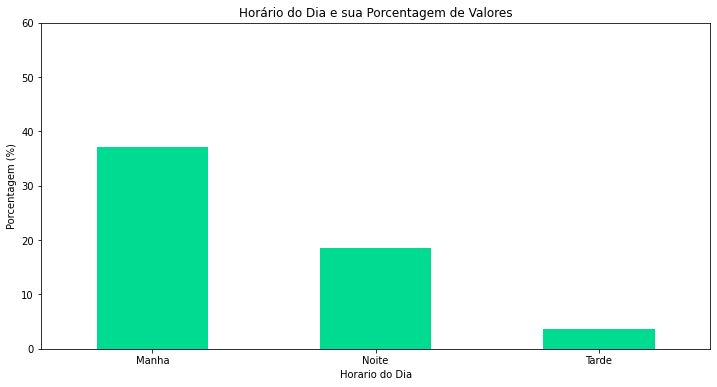

In [16]:
plt.figure(figsize=(12,6))
plt.title('Horário do Dia e sua Porcentagem de Valores')
plt.xlabel('Horario do Dia')
plt.ylabel('Porcentagem (%)')

ax = (df.HoraDoDia.value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 70, 10))


> Como é observado acima, praticamente 40% dos dados são registros durante o período da manhã e há uma boa diferença entre a quantidade do período matutino e diurno, mas isso se deve pois esse conjunto de dados cobre todo o período da manhã enquanto no período diurno só tem registros as as 20h e a cidade de São Paulo normalmente tem uma movimentação mais intensa após esse horário

In [17]:
# Vamos ver em formato tabulea 
df.HoraDoDia.value_counts()/len(df) * 100

Manha    37.037037
Noite    18.518519
Tarde     3.703704
Name: HoraDoDia, dtype: float64

As últimas duas células acima mostram a mesma informação mas uma em formato gráfico e outra tabular

In [18]:
# Stacked bar plot

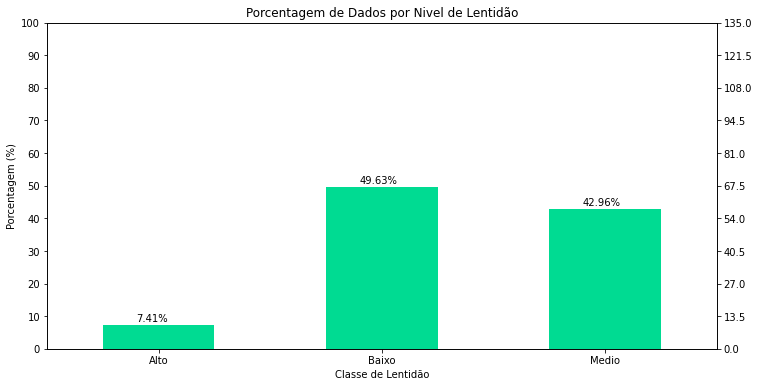

In [19]:
plt.figure(figsize=(12,6))
plt.title('Porcentagem de Dados por Nivel de Lentidão')
plt.xlabel('Classe de Lentidão')
plt.ylabel('Porcentagem (%)')

ax = (df.Class.value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(df)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

> O gráfico acima nos informa que praticamente 50% dos dados são do nível de LENTIDÃO _BAIXO_ , seguido de perto pela classe médio e bem distante está a classa alto

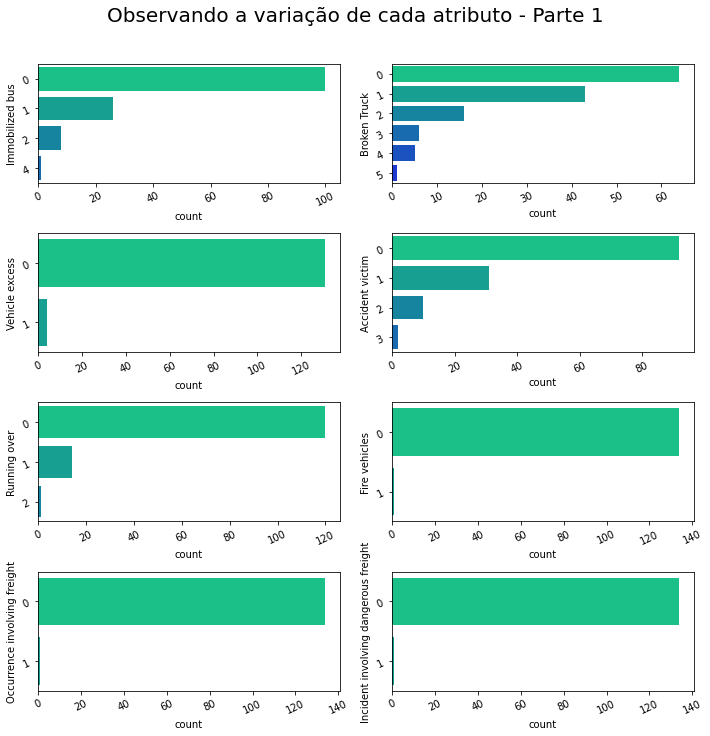

In [20]:
fig,ax =  plt.subplots(4, 2, figsize = (10, 10))
fig.suptitle('Observando a variação de cada atributo - Parte 1',y=1.02, fontsize=20)

ax[0][0].tick_params(labelrotation = 25)  
sns.countplot(y = 'Immobilized bus', 
              data = df, 
              ax = ax[0][0])
  
ax[0][1].tick_params(labelrotation = 25)
sns.countplot(y = 'Broken Truck',  
              data = df,
              ax = ax[0][1])
  
ax[1][0].tick_params(labelrotation = 25)
sns.countplot(y = 'Vehicle excess', 
              data = df,
              ax = ax[1][0])
  

ax[1][1].tick_params(labelrotation = 25) 
sns.countplot(y = 'Accident victim', 
              data = df, 
              ax = ax[1][1])

ax[2][0].tick_params(labelrotation = 25)
sns.countplot(y = 'Running over', 
              data = df, 
              ax = ax[2][0])

ax[2][1].tick_params(labelrotation = 25)
sns.countplot(y = 'Fire vehicles',  
              data = df, 
              ax = ax[2][1])

ax[3][0].tick_params(labelrotation = 25)
sns.countplot(y = 'Occurrence involving freight', 
              data = df, 
              ax = ax[3][0])
  
ax[3][1].tick_params(labelrotation = 25)
sns.countplot(y = 'Incident involving dangerous freight', 
              data = df,
              ax = ax[3][1])
  
fig.tight_layout(pad = 1.2)
plt.show()


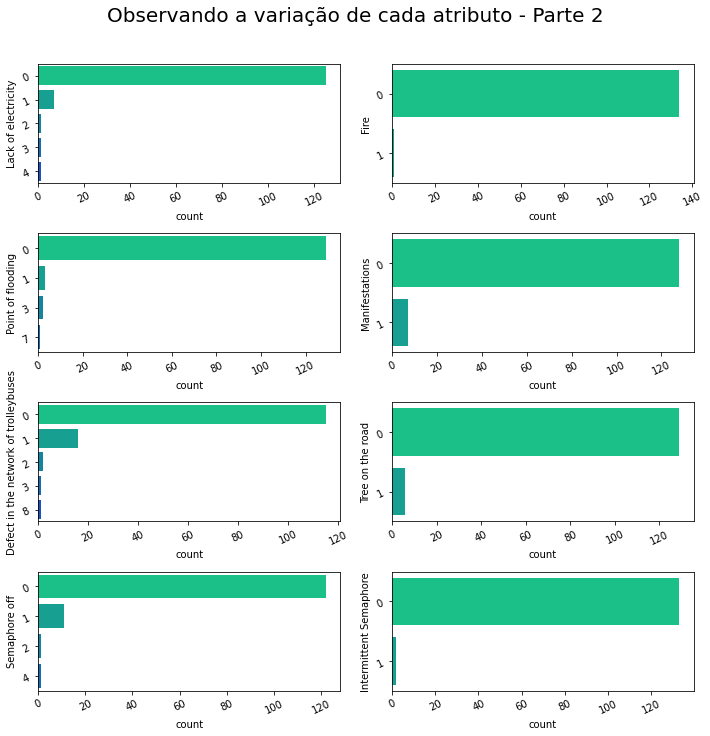

In [21]:
fig,ax =  plt.subplots(4, 2, figsize = (10, 10))
fig.suptitle('Observando a variação de cada atributo - Parte 2',y=1.02, fontsize=20)

ax[0][0].tick_params(labelrotation = 25)
sns.countplot(y = 'Lack of electricity', 
              data = df,
              ax = ax[0][0])
  
ax[0][1].tick_params(labelrotation = 25)
sns.countplot(y = 'Fire', 
              data = df, 
              ax = ax[0][1])

ax[1][0].tick_params(labelrotation = 25)
sns.countplot(y = 'Point of flooding', 
              data = df, 
              ax = ax[1][0])

ax[1][1].tick_params(labelrotation = 25)
sns.countplot(y = 'Manifestations',
              data = df, 
              ax = ax[1][1])

ax[2][0].tick_params(labelrotation = 25)
sns.countplot(y = 'Defect in the network of trolleybuses', 
              data = df, 
              ax = ax[2][0])
  
ax[2][1].tick_params(labelrotation = 25)
sns.countplot(y = 'Tree on the road',
              data = df,
              ax = ax[2][1])
  
ax[3][0].tick_params(labelrotation = 25)
sns.countplot(y = 'Semaphore off',
              data = df,
              ax = ax[3][0])
  
ax[3][1].tick_params(labelrotation = 25)
sns.countplot(y = 'Intermittent Semaphore', 
              data = df, 
              ax = ax[3][1])
  
fig.tight_layout(pad = 1.2)
plt.show()

### Conclusões

(In)Felizmente o unico acidente que acontece com uma certa frequencia é o onibus quebrado, e ele é o que mais tem chances de ocorrer em mais de um ponto 

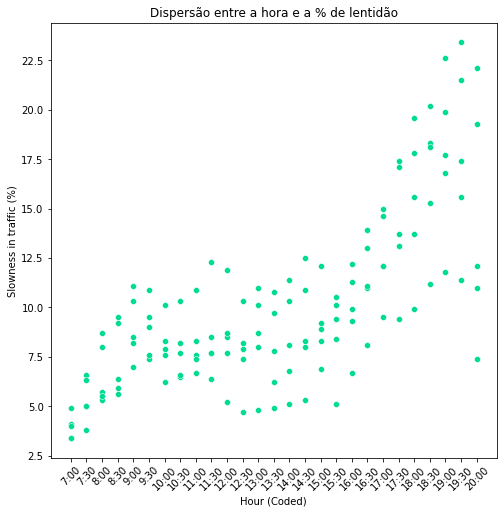

In [22]:
plt.figure(figsize = (8,8))
plt.title("Dispersão entre a hora e a % de lentidão")
plt.xticks(rotation = 45)
ax = sns.scatterplot(x='Hour (Coded)', y='Slowness in traffic (%)',
                data=df)

<AxesSubplot:xlabel='Hour (Coded)', ylabel='Slowness in traffic (%)'>

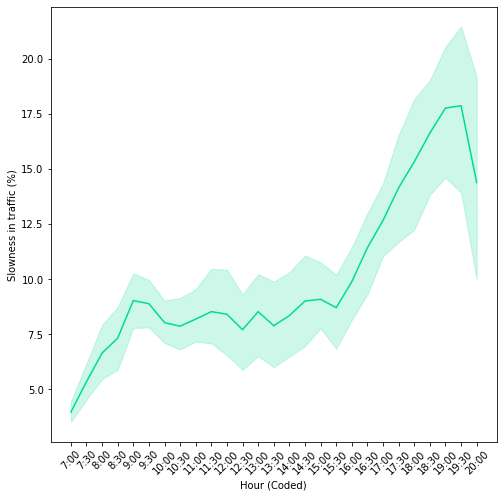

In [23]:
plt.figure(figsize = (8,8))
plt.xticks(rotation = 45)
sns.lineplot(x = 'Hour (Coded)', y = 'Slowness in traffic (%)', data= df)

### Conclusão: 
Os gráficos acima mostram de forma praticamente identicas que conforme o tempo vai passando, a lentidão do trafego de veiculos tem uma tendencia a aumentar

In [24]:
#sns.pairplot(df, hue='Class', markers=["o", "s", "D"])

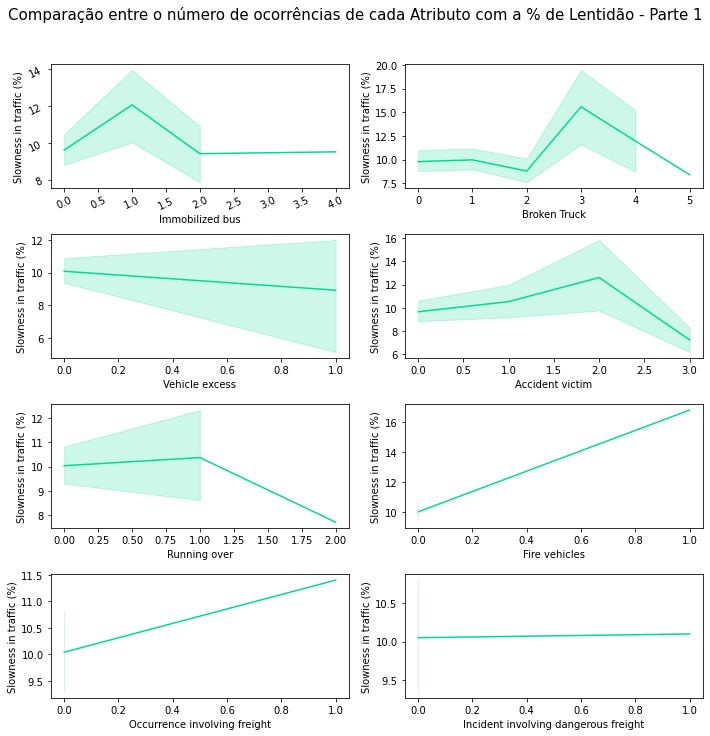

In [25]:
fig,ax =  plt.subplots(4, 2, figsize = (10, 10))
fig.suptitle('Comparação entre o número de ocorrências de cada Atributo com a % de Lentidão - Parte 1',y=1.02, fontsize=15)

ax[0][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Immobilized bus',y = 'Slowness in traffic (%)',
             data = df,ax = ax[0][0])
  

sns.lineplot(x = 'Broken Truck',y = 'Slowness in traffic (%)',
             data = df,ax = ax[0][1])
  

sns.lineplot(x = 'Vehicle excess',y = 'Slowness in traffic (%)',
             data = df,ax = ax[1][0])
  

sns.lineplot(x = 'Accident victim',y = 'Slowness in traffic (%)',
             data = df, ax = ax[1][1])


sns.lineplot(x = 'Running over',y = 'Slowness in traffic (%)',
             data = df, ax = ax[2][0])


sns.lineplot(x = 'Fire vehicles',y = 'Slowness in traffic (%)',
             data = df, ax = ax[2][1])
  
sns.lineplot(x = 'Occurrence involving freight', y = 'Slowness in traffic (%)',
              data = df, ax = ax[3][0])
  

sns.lineplot(x = 'Incident involving dangerous freight', y = 'Slowness in traffic (%)',
              data = df, ax = ax[3][1])

fig.tight_layout(pad = 1.2)

### Conclusões

Onibus imobilizado nao é garantia de lentidão, pois quando aconteceu em mais de um ponto, sua lentidão foi inferior a 10%, então depende muito da hora, caminhão quebrado idem, houve um momento que ocorreu em cinco pontos no mesmo horario e sua lentidão foi abaixo de 10, entao provavelmente isso ocorreu durante a tarde

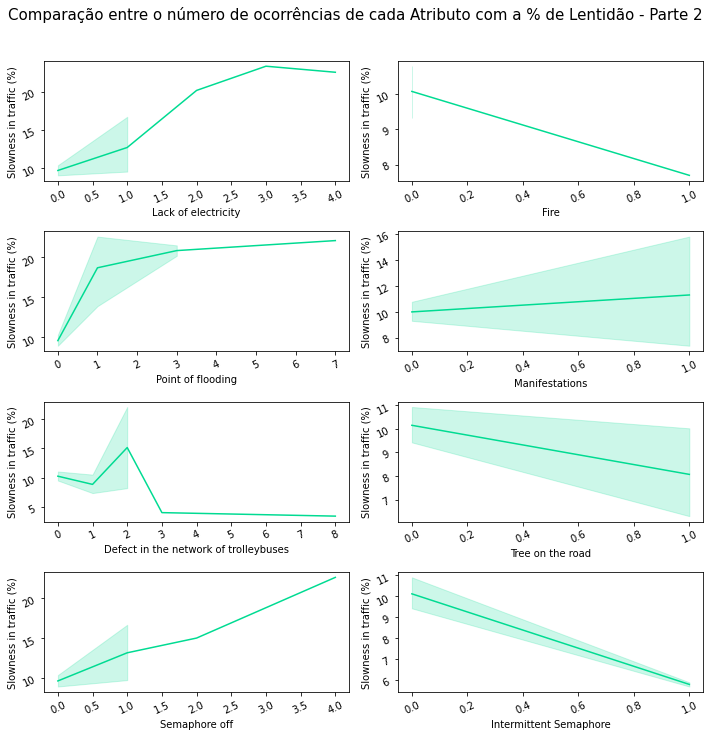

In [26]:
fig,ax =  plt.subplots(4, 2, figsize = (10, 10))
fig.suptitle('Comparação entre o número de ocorrências de cada Atributo com a % de Lentidão - Parte 2',y=1.02, fontsize=15)
 

ax[0][0].tick_params(labelrotation = 25)
sns.lineplot(x= 'Lack of electricity', y = 'Slowness in traffic (%)',
              data = df, ax = ax[0][0])

ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x= 'Fire', y = 'Slowness in traffic (%)',
              data = df, ax = ax[0][1])

ax[1][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Point of flooding', y = 'Slowness in traffic (%)',
              data = df, ax = ax[1][0])

ax[1][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Manifestations', y = 'Slowness in traffic (%)',
              data = df, ax = ax[1][1])

ax[2][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Defect in the network of trolleybuses', y = 'Slowness in traffic (%)',
              data = df, ax = ax[2][0])
  
ax[2][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Tree on the road', y = 'Slowness in traffic (%)',
              data = df,ax = ax[2][1])
  
ax[3][0].tick_params(labelrotation = 25)
sns.lineplot(x = 'Semaphore off', y = 'Slowness in traffic (%)',
              data = df, ax = ax[3][0])
  
ax[3][1].tick_params(labelrotation = 25)
sns.lineplot(x = 'Intermittent Semaphore', y = 'Slowness in traffic (%)',
              data = df, ax = ax[3][1])
  
fig.tight_layout(pad = 1.2)

### Conclusões

Falta de eletricidade, ponto de inundação e semafaro desligado são os maiores causadores de lentidão, quando um deles ocorre, no minimo o trafego de veiculos fica 13% mais lento

<AxesSubplot:>

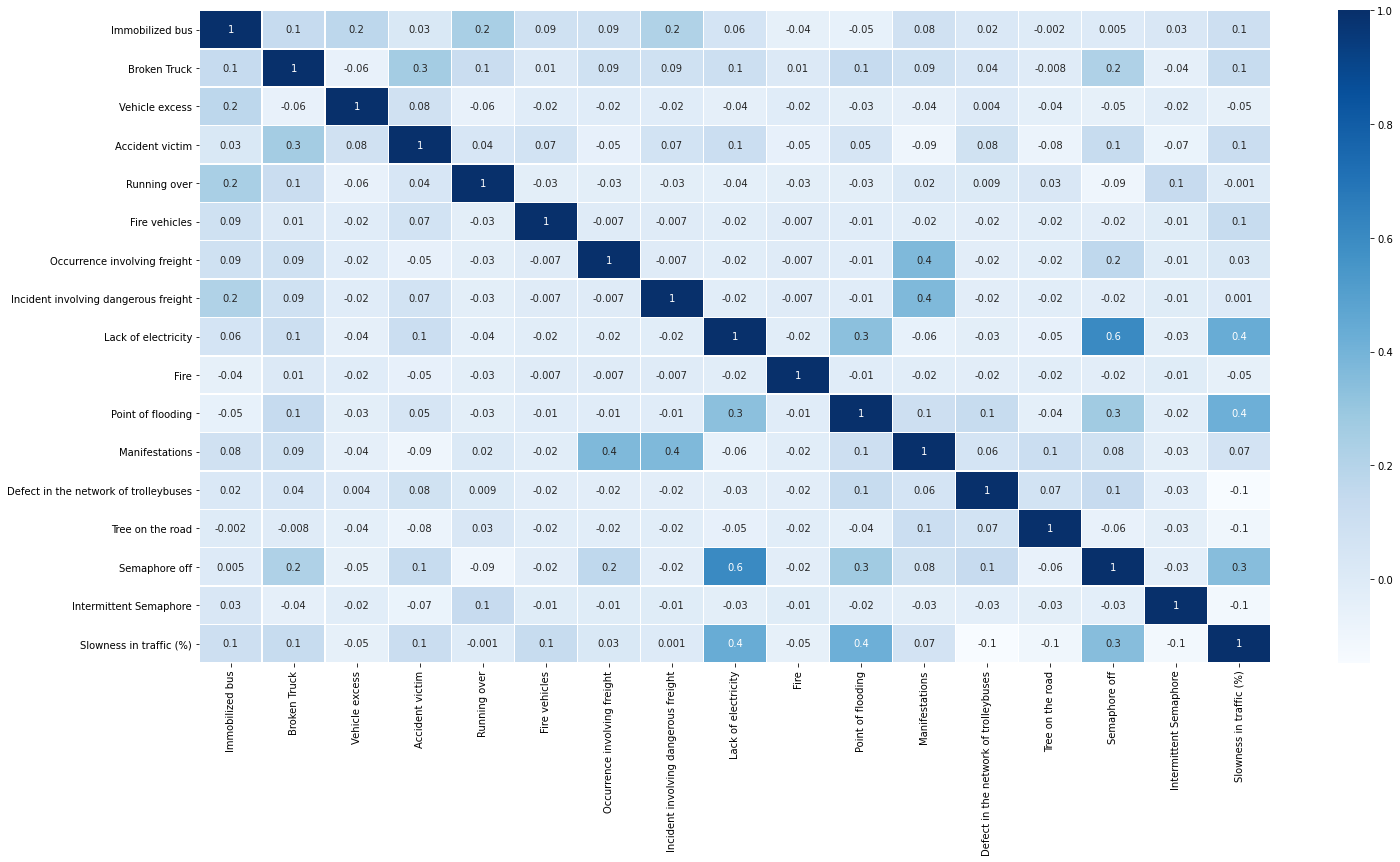

In [27]:
# Matrix de correlaçao para as variaveis numericas 
fig, ax = plt.subplots(figsize = (24,12))
sns.heatmap(df.corr(), annot= True, linewidths=.5, fmt = '.1g', cmap = 'Blues')

### Quebrar os dados em conjunto de treino e conjunto de teste

In [28]:
from sklearn.model_selection import train_test_split 

In [29]:
# Definindo X e Y (nossa variavel alvo)
X = df.drop(['Hour (Coded)', 'Class', 'HoraDoDia'], axis= 1)
y = df['Class']

In [30]:
# Dividindo em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30)

In [31]:
print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (94, 17)
Tamanho de X_test:  (41, 17)
Tamanho de y_train:  (94,)
Tamanho de y_test:  (41,)


### Treinar um estimador do scikit-learn de aprendizagem supervisionada (regressor ou classificador) no conjunto de treino

In [32]:
# Importando os algoritmos
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [33]:
# Instanciando os algoritmos
tree = DecisionTreeClassifier(random_state=1)
svm = LinearSVC(random_state=1)
nb = GaussianNB()
mlp = MLPClassifier(random_state=1)
rfc = RandomForestClassifier(random_state=1)
lrcv = LogisticRegression(random_state=1)

In [34]:
# Treinando os modelos com seus parametros padroes
tree.fit(X_train, y_train)
svm.fit(X_train, y_train)
nb.fit(X_train, y_train)
mlp.fit(X_train, y_train)
rfc.fit(X_train, y_train)
lrcv.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Verificar o desempenho do estimador do scikit-learn no conjunto de teste

In [35]:
# Importando metrica de avaliaçao
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
# Arvore de Decisão fazendo previsoes e vendo sua performance
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.9512195121951219

In [37]:
# Support Vector Machine fazendo previsoes e vendo sua performance

y_pred = svm.predict(X_test)
accuracy_score(y_test, y_pred)

0.7560975609756098

In [38]:
# Naive Bayes fazendo previsoes e vendo sua performance

y_pred = nb.predict(X_test)
accuracy_score(y_test, y_pred)

0.4634146341463415

In [39]:
# Multiple Layer Perceptron fazendo previsoes e vendo sua performance

y_pred = mlp.predict(X_test)
accuracy_score(y_test, y_pred)

0.7804878048780488

In [40]:
# Random Forest fazendo previsoes e vendo sua performance

y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.975609756097561

In [41]:
# Regressao Logistica fazendo previsoes e vendo sua performance

y_pred = lrcv.predict(X_test)
accuracy_score(y_test, y_pred)

0.9512195121951219

Nota-se que algoritmos baseados em arvores de decisao, MLP e regressao logistica foram os modelos com melhor performance

Agora vamos fazer um comparativo entre a acuracia entre dados de treino e de teste e sua respectiva confusion matrix

In [42]:
y_train_true = y_train
y_train_pred = tree.predict(X_train)
y_test_true = y_test
y_test_pred = tree.predict(X_test)

print(f"Acurácia em Dados de Treino com Arvore de Decisão: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia em Dados de Teste com Arvore de Decisão: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia em Dados de Treino com Arvore de Decisão: 1.0

 ---------------------------

Acurácia em Dados de Teste com Arvore de Decisão: 0.95


In [43]:
confusion_matrix(y_test_true, y_test_pred)

array([[ 1,  0,  2],
       [ 0, 16,  0],
       [ 0,  0, 22]], dtype=int64)

In [44]:
y_train_true = y_train
y_train_pred = svm.predict(X_train)
y_test_true = y_test
y_test_pred = svm.predict(X_test)

print(f"Acurácia em Dados de Treino com Support Vector Machine: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia em Dados de Teste com Support Vector Machine: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia em Dados de Treino com Support Vector Machine: 0.93

 ---------------------------

Acurácia em Dados de Teste com Support Vector Machine: 0.76


In [45]:
confusion_matrix(y_test_true, y_test_pred)

array([[ 0,  0,  3],
       [ 0, 16,  0],
       [ 0,  7, 15]], dtype=int64)

In [46]:
y_train_true = y_train
y_train_pred = nb.predict(X_train)
y_test_true = y_test
y_test_pred = nb.predict(X_test)

print(f"Acurácia em Dados de Treino com Naive Bayes: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia em Dados de Teste com Naive Bayes: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia em Dados de Treino com Naive Bayes: 0.53

 ---------------------------

Acurácia em Dados de Teste com Naive Bayes: 0.46


In [47]:
confusion_matrix(y_test_true, y_test_pred)

array([[ 3,  0,  0],
       [ 1,  1, 14],
       [ 4,  3, 15]], dtype=int64)

In [48]:
y_train_true = y_train
y_train_pred = mlp.predict(X_train)
y_test_true = y_test
y_test_pred = mlp.predict(X_test)

print(f"Acurácia em Dados de Treino com Multiple Layer Perceptron: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia em Dados de Teste com Multiple Layer Perceptron: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia em Dados de Treino com Multiple Layer Perceptron: 0.93

 ---------------------------

Acurácia em Dados de Teste com Multiple Layer Perceptron: 0.78


In [49]:
confusion_matrix(y_test_true, y_test_pred)

array([[ 1,  0,  2],
       [ 0, 16,  0],
       [ 0,  7, 15]], dtype=int64)

In [50]:
y_train_true = y_train
y_train_pred = rfc.predict(X_train)
y_test_true = y_test
y_test_pred = rfc.predict(X_test)

print(f"Acurácia em Dados de Treino com Random Forest: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia em Dados de Teste com Random Forest: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia em Dados de Treino com Random Forest: 1.0

 ---------------------------

Acurácia em Dados de Teste com Random Forest: 0.98


In [51]:
confusion_matrix(y_test_true, y_test_pred)

array([[ 2,  0,  1],
       [ 0, 16,  0],
       [ 0,  0, 22]], dtype=int64)

In [52]:
y_train_true = y_train
y_train_pred = lrcv.predict(X_train)
y_test_true = y_test
y_test_pred = lrcv.predict(X_test)

print(f"Acurácia em Dados de Treino com Regressão Logistica: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia em Dados de Teste com Regressão Logistica: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia em Dados de Treino com Regressão Logistica: 1.0

 ---------------------------

Acurácia em Dados de Teste com Regressão Logistica: 0.95


In [53]:
confusion_matrix(y_test_true, y_test_pred)

array([[ 2,  0,  1],
       [ 0, 16,  0],
       [ 0,  1, 21]], dtype=int64)

CONCLUSÃO: modelos de ML de aprendizagem probabilisticas não são o ideal para esse problema,
pois vimos o Naive Bayes foi o modelo com pior performance de todos 